# 3.15.x Final Assignment

### Assignment Instructions

#### Part 2   |   Advanced Difficulty Level

In this second part, you will be working with a datasets containing information on indian startups' funding, including the startup's details, the funding it received, and the investors' information.

In the usual `data` folder, you will find the following three datasets, including data from 2019, 2020 and 2021:

- `startup_funding2019.csv`
- `startup_funding2020.csv`
- `startup_funding2021.csv`

At [this link](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data?select=startup_funding2019.csv) you can find the source of the original data (Kaggle) as well as more information on its composition *(note: the files in the data folder are slightly different from the originals)*.

1. Using a **for loop**, load all three .csv files in a temporary DataFrame called `df_tmp` and, at each cycle, add a new column named `Year` that includes the year of that csv file to the temporary table and append it to a final DataFrame named `fnd`. Your final `fnd` DataFrame should include the contents from all three csv files stacked one on top of the other.

    What is the **shape** of the `fnd` DataFrame?

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Lista dei file
file_names = ['data/startup_funding2019.csv', 'data/startup_funding2020.csv', 'data/startup_funding2021.csv']

# Inizializza il DataFrame finale
fnd = pd.DataFrame()

# Itera sui nomi dei file
for file_name in file_names:
    # Legge i CSV in un temporary DataFrame
    df_tmp = pd.read_csv(file_name)
    
    # Estrae l'anno dal nome del file
    year = int(file_name[-8:-4])  # Assuming the year is present in the file name
    
    # Aggiunge la colonna "Anni" al temporary DataFrame
    df_tmp['Year'] = year
    
    # Aggiunge il temporary DataFrame al DataFrame finale
    fnd = pd.concat([fnd, df_tmp], ignore_index=True)

# Scrivi il DataFrame finale
print(fnd)

       Company/Brand Founded HeadQuarter                 Sector  \
0     Bombay Shaving     NaN         NaN              Ecommerce   
1          Ruangguru  2014.0      Mumbai                 Edtech   
2           Eduisfun     NaN      Mumbai                 Edtech   
3           HomeLane  2014.0     Chennai        Interior design   
4           Nu Genes  2004.0   Telangana               AgriTech   
...              ...     ...         ...                    ...   
2338        Gigforce    2019    Gurugram  Staffing & Recruiting   
2339          Vahdam    2015   New Delhi       Food & Beverages   
2340    Leap Finance    2019   Bangalore     Financial Services   
2341    CollegeDekho    2015    Gurugram                 EdTech   
2342          WeRize    2019   Bangalore     Financial Services   

                                           What it does  \
0            Provides a range of male grooming products   
1     A learning platform that provides topic-based ...   
2               It

In [3]:
# Scrive il numero di righe e colonne
print(fnd.shape)

(2343, 10)


2. If you check the columns' data types, you'll notice that the columns `Founded`, `Amount($)` and `Year` are being interpreted as strings instead of numbers. Format those three columns to numeric data types.

    What is the **total** `Amount($)` of funding given in the three years available?

In [4]:
# Converte la colonna 'Founded' in dati numerici
fnd['Founded'] = pd.to_numeric(fnd['Founded'], errors='coerce')

# Converte la colonna 'Amount($)' in dati numerici rimuovendo il simbolo ($)
fnd['Amount($)'] = pd.to_numeric(fnd['Amount($)'].str.replace('$', ''), errors='coerce')

# Converte la colonna 'Year' in dati numerici
fnd['Year'] = pd.to_numeric(fnd['Year'], errors='coerce')

# Calcola la somma totale($) dei finanziamenti erogati nei tre anni disponibili
total_funding = fnd['Amount($)'].sum()


In [5]:
import numpy as np

total_funding = np.nansum(fnd['Amount($)'])
print("Total Amount($):", total_funding)

Total Amount($): 17585037000.0


In [6]:
fnd.head(30)

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage,Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,NaN,NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,NaN,Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",NaN,Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...",NaN,Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),NaN,NaN,2019
5,FlytBase,NaN,Pune,Technology,A drone automation platform,Nitin Gupta,Undisclosed,NaN,NaN,2019
6,Finly,NaN,Bangalore,SaaS,It builds software products that makes work si...,"Vivek AG, Veekshith C Rai","Social Capital, AngelList India, Gemba Capital...",NaN,NaN,2019
7,Kratikal,2013.0,Noida,Technology,It is a product-based cybersecurity solutions ...,"Pavan Kushwaha, Paratosh Bansal, Dip Jung Thapa","Gilda VC, Art Venture, Rajeev Chitrabhanu.",NaN,Pre series A,2019
8,Quantiphi,NaN,NaN,AI & Tech,It is an AI and big data services company prov...,Renuka Ramnath,Multiples Alternate Asset Management,NaN,Series A,2019
9,Lenskart,2010.0,Delhi,E-commerce,It is a eyewear company,"Peyush Bansal, Amit Chaudhary, Sumeet Kapahi",SoftBank,NaN,Series G,2019


3. The following code shows us that "Inflection Point Ventures" was the `Investor` that funded the highest number of `Company/Brand`s overall (36 companies funded from 2019 to 2021).

    How did "Inflection Point Ventures" **rank** *(in terms of most `Company/Brand`s funded) **in 2020**? (Note: in the answer write the rank number, where 1 = most funded company)*

In [7]:
# run this cell (don not delete it)
fnd.groupby('Investor', as_index=False).size().sort_values('size', ascending=False).head(1)

,Investor,size
696,Inflection Point Ventures,36


In [8]:
# Filtra il DataFrame per l'anno 2020
df_2020 = fnd[fnd['Year'] == 2020]

# Conta le occorrenze per investitore nel 2020
investor_counts = df_2020['Investor'].value_counts()

# Trova il rank di "Inflection Point Ventures" nel 2020
rank_2020 = investor_counts.index.tolist().index('Inflection Point Ventures') + 1

# Scrive il rank di "Inflection Point Ventures" nel 2020
print("Rank in 2020:", rank_2020)

Rank in 2020: 4


4. Load the `Software Professionals Salary.csv` file in a DataFrame named `sps` (just like you did in Part 1), then perform the following tasks **and answer the question at the end**:
    1. starting from the `sps` DataFrame, create a new DF called `sps_loc` where you group by `Location` and show, for each city in the dataset, the average `Rating` and `Salary`;
    2. starting from the `fnd` DataFrame, create a new DF called `fnd_loc` where you group by `HeadQuarter` and show, for each city in the dataset **for the year 2021**, the total number of `Company/Brand`s funded and the total `Amount($)` invested;
    3. merge the two DataFrames you just created so to **keep just the cities that are in both datasets** and save the results in a third DataFrame called `sps_fnd_loc` *(note: make sure to use the correct type of join)*;
    4. using the `sps_fnd_loc` DataFrame:
        1. delete the `HeadQuarter` column
        2. create a new column `Amount($MM)` that is equal to `Amount($)` divided by 1,000,000
        3. delete the `Amount($)` column
        4. rename all the columns to the following names: `['City', 'Avg. Rating', 'Avg. Salary', 'Nr. Companies Funded', 'Sum Funding ($MM)']`
    
    **Question**: Look at the `City` that received the **highest** `Avg. Rating` score by employees: what is the `Nr. Companies Funded` in that city?

In [9]:
import pandas as pd

# Carica il file CSV "Software_Professional_Salary" in un DataFrame
sps = pd.read_csv('archive/Salary_Dataset_with_Extra_Features.csv')

#### Punto 1

In [10]:
# Crea un nuovo DataFrame 
sps_loc = sps.groupby('Location').agg({'Rating': 'mean', 'Salary': 'mean'}).reset_index()

#### Punto 2


In [11]:
# Filtra il DataFrame per l'anno 2021
fnd_2021 = fnd[fnd['Year'] == 2021]

# # Effettua il group by 'HeadQuarter' e calcola il numero di compagnie e il valore totale investito
fnd_loc = fnd_2021.groupby('HeadQuarter').agg({'Company/Brand': 'count', 'Amount($)': 'sum'}).reset_index()


#### Punto 3

In [12]:
# Effettua il merge dei due DataFrame
sps_fnd_loc = sps_loc.merge(fnd_loc, left_on='Location', right_on='HeadQuarter', how='inner')

#### Punto 4

In [13]:
# Cancella la colonna 'HeadQuarter'
sps_fnd_loc = sps_fnd_loc.drop('HeadQuarter', axis=1)

# Crea una nuova colonna 'Amount($MM)'dividento 'Amount($)' per 1,000,000
sps_fnd_loc['Amount($MM)'] = sps_fnd_loc['Amount($)'] / 1000000

# Cancella la colonna 'Amount($)'
sps_fnd_loc = sps_fnd_loc.drop('Amount($)', axis=1)

# Rinomina le colonne
sps_fnd_loc = sps_fnd_loc.rename(columns={'Location': 'City',
                                          'Rating': 'Avg. Rating',
                                          'Salary': 'Avg. Salary',
                                          'Company/Brand': 'Nr. Companies Funded',
                                          'Amount($MM)': 'Sum Funding ($MM)'})


In [14]:
display(sps_fnd_loc)

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,Bangalore,3.920232,735344.739593,425,8615.095
1,Chennai,3.902726,584559.661513,40,352.800
2,Hyderabad,3.914484,679099.157376,34,216.260
3,Jaipur,3.940741,629135.802469,11,315.500
4,Kolkata,4.024719,710925.573034,5,28.000
5,Mumbai,3.881709,961180.368491,200,2287.580
6,New Delhi,3.943415,658756.735632,143,999.850
7,Pune,3.886082,690476.311153,46,416.220


In [15]:
highest_rating_city = sps_fnd_loc.loc[sps_fnd_loc['Avg. Rating'].idxmax(), 'City']
num_companies_funded = sps_fnd_loc.loc[sps_fnd_loc['City'] == highest_rating_city, 'Nr. Companies Funded'].values[0]

print("Città con il rating medio più alto:", highest_rating_city)
print("Numero di compagnie fondate:", num_companies_funded)

Città con il rating medio più alto: Kolkata
Numero di compagnie fondate: 5


5. Create a scatterplot that shows the relationship between the `Avg. Salary` and the `Sum Funding ($MM)`. Which `City` stands out in terms of total funding received by companies and salary paid to their employees?

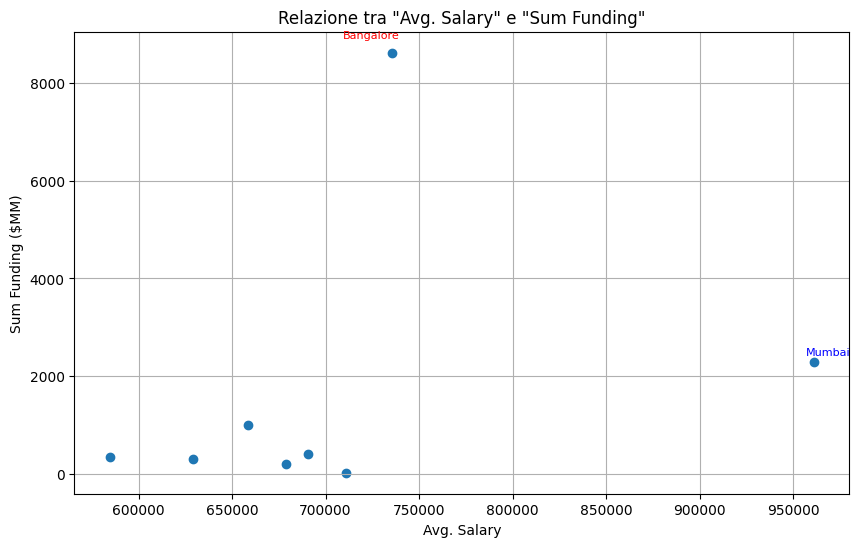

In [28]:
import matplotlib.pyplot as plt

# Traccia lo scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(sps_fnd_loc['Avg. Salary'], sps_fnd_loc['Sum Funding ($MM)'])
plt.xlabel('Avg. Salary')
plt.ylabel('Sum Funding ($MM)')
plt.title('Relazione tra "Avg. Salary" e "Sum Funding"')
plt.grid(True)

# Identifica le città con salario e finanziamenti più alti
highest_funding_city = sps_fnd_loc.loc[sps_fnd_loc['Sum Funding ($MM)'].idxmax(), 'City']
highest_salary_city = sps_fnd_loc.loc[sps_fnd_loc['Avg. Salary'].idxmax(), 'City']

# Annota la città con salrio e finanziamenti più alti
plt.annotate(highest_funding_city, (sps_fnd_loc.loc[sps_fnd_loc['City'] == highest_funding_city, 'Avg. Salary'].values[0],
                                    sps_fnd_loc.loc[sps_fnd_loc['City'] == highest_funding_city, 'Sum Funding ($MM)'].values[0]),
             textcoords="offset points", xytext=(-15, 10), ha='center', fontsize=8, color='red')
plt.annotate(highest_salary_city, (sps_fnd_loc.loc[sps_fnd_loc['City'] == highest_salary_city, 'Avg. Salary'].values[0],
                                   sps_fnd_loc.loc[sps_fnd_loc['City'] == highest_salary_city, 'Sum Funding ($MM)'].values[0]),
             textcoords="offset points", xytext=(10, 5), ha='center', fontsize=8, color='blue')

# Visualizza lo scatterplot
plt.show()

### Setup Esercizio 6
Installo BeautifulSoup per lo scraping

In [17]:
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


6. [BONUS] --> optional

    Using libraries of your choice, scrape [this census page](https://www.census2011.co.in/city.php) and create a DataFrame called `cities` containing the first table from that page. *(Note: make sure to convert the variables `Population` and `Literacy` to numeric, you will need them later)*
    1. Which City has the highest levels of `Literacy` in the country?
    2. Merge the `cities` table with the `sps_fnd_loc` in a new DataFrame called `sps_fnd_loc_lit`. The resulting DataFrame is missing one row compared to the `sps_fnd_loc` dataset. Which `City` is missing? Figure out why and fix the problem.
    3. Looking at the new `sps_fnd_loc_lit` DataFrame, produce a scatterplot that shows `Literacy` on the x-axis, `Avg. Salary` on the y-axis and the `Population` as the size of the circles. Try also to add the `City` labels to each circle in the chart. There seems to be a positive direct relationship between the two variables (higher levels of literacy correspond to higher salaries), but there is one city that escapes this interpretation. Which city is it? Try to describe the chart and give your interpretation.

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Send a GET request to the URL
url = 'https://www.census2011.co.in/city.php'
response = requests.get(url)

# Create a BeautifulSoup object
soup = BeautifulSoup(response.content, 'html.parser')

# Find the first table on the page
table = soup.find('table')

# Extract the table headers
headers = table.find_all('th')
columns = [header.text.strip() for header in headers]

# Extract the table data
data = []
for row in table.find_all('tr'):
    cols = row.find_all('td')
    if len(cols) > 0:
        data.append([col.text.strip() for col in cols])

# Convert the table data into a DataFrame with proper column names
cities = pd.DataFrame(data[1:], columns=columns)

# Convert 'Total Population' and 'Literacy' columns to numeric
cities['Population'] = pd.to_numeric(cities['Population'].str.replace(',', ''), errors='coerce')
cities['Literacy'] = pd.to_numeric(cities['Literacy'], errors='coerce')

# Display the DataFrame
print(cities)

       #        City           State  Population Metropolitan Sexratio  \
0      2       Delhi           Delhi    11034555   16,314,838      876   
1      3   Bangalore       Karnataka     8443675    8,499,399      923   
2      4   Hyderabad  Andhra Pradesh     6731790    7,749,334      955   
3      5   Ahmedabad         Gujarat     5577940    6,352,254      898   
4      6     Chennai      Tamil Nadu     4646732    8,696,010      989   
..   ...         ...             ...         ...          ...      ...   
492  494     Gangtok          Sikkim      100286      100,286      912   
493  495       Datia  Madhya Pradesh      100284      100,284      900   
494  496       Nagda  Madhya Pradesh      100039      100,039      947   
495  497    Banswara       Rajasthan       99969      101,177      960   
496  498  Kapurthala          Punjab       98916       98,916      839   

     Literacy  
0       87.59  
1       88.71  
2       83.26  
3       88.29  
4       90.18  
..        ...  

#### Parte 1

In [19]:
# Trova la città con il tasso di alfabetizzazione più alto
highest_literacy_city = cities.loc[cities['Literacy'].idxmax(), 'City']

print("Città con il tasso di alfabetizzazione più alto:", highest_literacy_city)


Città con il tasso di alfabetizzazione più alto: Aizawl


#### Parte 2

In [20]:
# Effettua il merge della tabella città con sps_fnd_loc
sps_fnd_loc_lit = sps_fnd_loc.merge(cities, on='City', how='left')

# Trova la città mancante
missing_city = sps_fnd_loc[~sps_fnd_loc['City'].isin(sps_fnd_loc_lit['City'])]['City'].values

In [21]:
display(sps_fnd_loc)

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM)
0,Bangalore,3.920232,735344.739593,425,8615.095
1,Chennai,3.902726,584559.661513,40,352.800
2,Hyderabad,3.914484,679099.157376,34,216.260
3,Jaipur,3.940741,629135.802469,11,315.500
4,Kolkata,4.024719,710925.573034,5,28.000
5,Mumbai,3.881709,961180.368491,200,2287.580
6,New Delhi,3.943415,658756.735632,143,999.850
7,Pune,3.886082,690476.311153,46,416.220


In [22]:
# Visualizza il DataFrame Fixato
display(sps_fnd_loc_lit)

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM),#,State,Population,Metropolitan,Sexratio,Literacy
0,Bangalore,3.920232,735344.739593,425,8615.095,3,Karnataka,8443675.0,"8,499,399",923,88.71
1,Chennai,3.902726,584559.661513,40,352.800,6,Tamil Nadu,4646732.0,"8,696,010",989,90.18
2,Hyderabad,3.914484,679099.157376,34,216.260,4,Andhra Pradesh,6731790.0,"7,749,334",955,83.26
3,Jaipur,3.940741,629135.802469,11,315.500,10,Rajasthan,3046163.0,"3,046,163",900,83.33
4,Kolkata,4.024719,710925.573034,5,28.000,7,West Bengal,4496694.0,"14,112,536",908,86.31
5,Mumbai,3.881709,961180.368491,200,2287.580,NaN,NaN,NaN,NaN,NaN,NaN
6,New Delhi,3.943415,658756.735632,143,999.850,NaN,NaN,NaN,NaN,NaN,NaN
7,Pune,3.886082,690476.311153,46,416.220,9,Maharashtra,3124458.0,"5,049,968",948,89.56


#### Parte 3

In [23]:
sps_fnd_loc_lit['Literacy'].dtype
sps_fnd_loc_lit['Avg. Salary'].dtype

dtype('float64')

In [24]:
# Sostituisci i valori NaN nella colonna 'Avg. Salary' con 0
# sps_fnd_loc_lit['Avg. Salary'] = sps_fnd_loc_lit['Avg. Salary'].fillna(0)

# Sostituisci i valori NaN nella colonna 'Literacy' con 0
# sps_fnd_loc_lit['Literacy'] = sps_fnd_loc_lit['Literacy'].fillna(0)

In [25]:
sps_fnd_loc_lit.head(7)

,City,Avg. Rating,Avg. Salary,Nr. Companies Funded,Sum Funding ($MM),#,State,Population,Metropolitan,Sexratio,Literacy
0,Bangalore,3.920232,735344.739593,425,8615.095,3,Karnataka,8443675.0,"8,499,399",923,88.71
1,Chennai,3.902726,584559.661513,40,352.800,6,Tamil Nadu,4646732.0,"8,696,010",989,90.18
2,Hyderabad,3.914484,679099.157376,34,216.260,4,Andhra Pradesh,6731790.0,"7,749,334",955,83.26
3,Jaipur,3.940741,629135.802469,11,315.500,10,Rajasthan,3046163.0,"3,046,163",900,83.33
4,Kolkata,4.024719,710925.573034,5,28.000,7,West Bengal,4496694.0,"14,112,536",908,86.31
5,Mumbai,3.881709,961180.368491,200,2287.580,NaN,NaN,NaN,NaN,NaN,NaN
6,New Delhi,3.943415,658756.735632,143,999.850,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


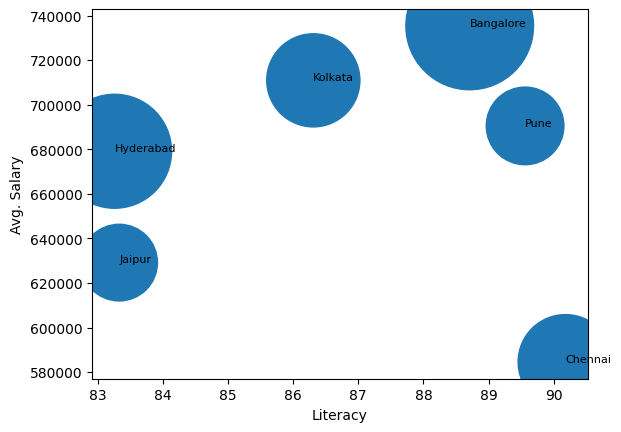

In [33]:
import matplotlib.pyplot as plt

# Creazione dello scatterplot
plt.scatter(sps_fnd_loc_lit['Literacy'], sps_fnd_loc_lit['Avg. Salary'], s=sps_fnd_loc_lit['Population']/1000)

# Aggiunta delle etichette delle città
for i, row in sps_fnd_loc_lit.iterrows():
    plt.text(row['Literacy'], row['Avg. Salary'], row['City'], fontsize=8)

# Titoli degli assi
plt.xlabel('Literacy')
plt.ylabel('Avg. Salary')

# Mostrare il grafico
plt.show()

La città è Chennai dove il livello di educazione sembra non essere correlato ai salari 